In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn import preprocessing as pp
from sklearn import linear_model as lm
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set()

preMkt = pd.read_csv('cloudLoose.csv')

In [5]:
preMkt

,account,entry_collect,entry_collect.OpenLessPreMktLow,entry_collect.SPYGap,entry_collect.SPYLastLessOpen,entry_collect.SPYNetpercChange,entry_collect.VWAPLessLast,entry_collect.breakTime,entry_collect.dayHighLessPreMktLow,entry_collect.gap,...,entry_time,exit_collect,exit_fees,exit_price,exit_shares,exit_side,exit_time,matched_shares,mtm_pl,symbol
0,Cloud,NaN,0.352517,0.434785,-0.246645,0.067163,0.304059,2017-04-27 09:32:28.658000,0.352517,-45.062374,...,2017-04-27 09:32:28.659700,NaN,0.37,39.299999,100.0,1.0,2017-04-27 09:35:47.641700,-100.0,-70.000076,CTB
1,Cloud,NaN,0.207357,0.365356,-0.148122,0.092280,0.121727,2017-04-27 09:32:12.563000,0.207357,-42.357623,...,2017-04-27 09:32:12.564700,NaN,0.36,44.209999,98.0,1.0,2017-04-27 13:24:36.922700,-98.0,-76.439880,AAL
2,Cloud,NaN,0.162858,0.376620,-0.173035,0.083899,0.207571,2017-04-27 09:32:01.314000,0.325716,-57.771440,...,2017-04-27 09:32:01.315700,NaN,0.37,58.130001,101.0,1.0,2017-04-27 09:32:29.804700,-101.0,-73.729954,LVS
3,Cloud,NaN,0.201064,0.826617,-0.424473,0.075507,0.209571,2017-04-27 09:32:33.336000,0.268084,-14.191457,...,2017-04-27 09:32:33.337700,NaN,0.83,6.940000,223.0,1.0,2017-04-27 13:45:44.626700,-223.0,-51.290004,CLF
4,Cloud,NaN,0.256126,0.062753,0.005124,0.206959,0.225531,2017-10-24 09:33:40.421000,0.526336,-39.852027,...,2017-10-24 09:33:40.422700,NaN,0.05,314.029999,12.0,1.0,2017-10-24 15:45:06.451700,-12.0,33.239868,BIIB
5,Cloud,NaN,0.257159,0.434527,0.088681,0.230384,0.137606,2017-10-24 09:34:14.538000,0.257159,-108.886407,...,2017-10-24 09:34:14.539700,NaN,0.32,124.209999,88.0,1.0,2017-10-24 11:01:41.530700,-88.0,-54.560242,BUD
6,Cloud,NaN,0.070298,0.689015,-0.028149,0.183511,0.077363,2017-10-24 09:32:00.854000,0.168724,-116.690067,...,2017-10-24 09:32:00.855700,NaN,0.52,83.180000,140.0,1.0,2017-10-24 15:45:00.077700,-140.0,60.200043,NVS
7,Cloud,NaN,0.048354,-0.063229,-0.026407,-0.110060,0.102493,2016-08-24 09:32:08.381000,0.048354,-37.168137,...,2016-08-24 09:32:08.382700,NaN,0.14,99.480003,37.0,1.0,2016-08-24 15:45:03.379700,-37.0,97.679977,GOLD
8,Cloud,NaN,0.059516,1.034129,-0.037212,0.495565,0.080464,2018-02-23 09:32:04.868000,0.208311,-37.909635,...,2018-02-23 09:32:04.869700,NaN,0.27,52.900002,74.0,1.0,2018-02-23 09:39:28.869700,-74.0,-51.060181,GIS
9,Cloud,NaN,0.127588,0.148409,-0.006878,0.490236,0.339370,2018-02-23 09:51:38.678000,0.661586,-13.146718,...,2018-02-23 09:51:38.679700,NaN,0.04,129.449997,10.0,1.0,2018-02-23 15:45:00.317700,-10.0,18.500061,OLED


In [6]:
preMkt.shape

(1065, 32)

In [7]:
preMkt.columns = preMkt.columns.str.replace('entry_collect.', '')

In [8]:
preMkt.sort_values('mtm_pl', ascending=False)

,account,entry_collect,OpenLessPreMktLow,SPYGap,SPYLastLessOpen,SPYNetpercChange,VWAPLessLast,breakTime,dayHighLessPreMktLow,gap,...,entry_time,exit_collect,exit_fees,exit_price,exit_shares,exit_side,exit_time,matched_shares,mtm_pl,symbol
866,Cloud,NaN,0.306297,0.784433,0.112055,0.444365,0.144314,2018-02-22 09:32:00.276000,0.530416,-32.393846,...,2018-02-22 09:32:00.277700,NaN,0.27,38.180000,74.0,1.0,2018-02-22 15:45:00.298700,-74.0,435.120079,MIC
1028,Cloud,NaN,0.107539,0.688229,0.365627,0.213742,0.159626,2017-02-09 09:37:31.457000,0.236584,-23.755351,...,2017-02-09 09:37:31.458700,NaN,0.74,9.430000,200.0,1.0,2017-02-09 15:45:00.104700,-200.0,401.999855,CDE
180,Cloud,NaN,0.315517,-0.328131,0.037861,-0.191766,0.081768,2017-05-11 09:33:23.285000,0.536378,-33.391368,...,2017-05-11 09:33:23.286700,NaN,0.23,47.599998,63.0,1.0,2017-05-11 15:45:00.042700,-63.0,396.900192,DDS
984,Cloud,NaN,0.141854,0.085110,-0.006079,0.161016,0.188962,2017-07-05 09:32:00.411000,0.222911,-39.447927,...,2017-07-05 09:32:00.412700,NaN,0.07,179.610001,20.0,1.0,2017-07-05 15:45:00.865700,-20.0,372.799988,ORLY
409,Cloud,NaN,0.000000,-0.693675,-0.090087,-0.796300,0.040560,2016-09-09 09:37:03.426000,0.139639,-33.116346,...,2016-09-09 09:37:03.427700,NaN,0.17,67.440002,45.0,1.0,2016-09-09 15:45:00.584700,-45.0,372.149849,SVXY
256,Cloud,NaN,0.052740,0.009584,0.000000,0.009513,0.124261,2016-04-21 09:34:02.285000,0.234933,-15.790445,...,2016-04-21 09:34:02.286700,NaN,0.17,27.170000,47.0,1.0,2016-04-21 15:45:00.036700,-47.0,362.370047,XON
727,Cloud,NaN,0.117606,0.164647,-0.082324,0.056064,0.451274,2017-09-19 10:18:25.260000,0.758556,-25.284841,...,2017-09-19 10:18:25.261700,NaN,0.21,38.299999,58.0,1.0,2017-09-19 15:45:00.048700,-58.0,356.700089,SUPN
754,Cloud,NaN,-0.090246,-0.312387,-0.012139,-0.214595,0.017635,2016-08-25 09:36:11.050000,0.388529,-55.637695,...,2016-08-25 09:36:11.051700,NaN,0.26,76.480003,69.0,1.0,2016-08-25 15:45:00.028700,-69.0,342.929558,DG
1063,Cloud,NaN,0.057533,-0.198751,0.008718,-0.538272,0.091416,2016-03-15 09:32:00.200000,0.127271,-8.327334,...,2016-03-15 09:32:00.201700,NaN,0.06,33.480000,17.0,1.0,2016-03-15 15:45:00.024700,-17.0,321.640034,VRX
688,Cloud,NaN,0.195539,-1.248901,0.012608,-0.816399,0.292423,2017-05-17 09:53:36.708000,0.529841,-62.422883,...,2017-05-17 09:53:36.709700,NaN,0.23,95.779999,63.0,1.0,2017-05-17 15:45:00.836700,-63.0,280.979942,TQQQ


In [9]:
preMkt.columns

Index([u'account', u'entry_collect', u'OpenLessPreMktLow', u'SPYGap',
       u'SPYLastLessOpen', u'SPYNetpercChange', u'VWAPLessLast', u'breakTime',
       u'dayHighLessPreMktLow', u'gap', u'highLessOpen', u'preMktBars',
       u'preMktLowLessLast', u'preMktRange', u'rvol', u'spread', u'vxxRVOL',
       u'entry_fees', u'entry_pl', u'entry_price', u'entry_shares',
       u'entry_side', u'entry_time', u'exit_collect', u'exit_fees',
       u'exit_price', u'exit_shares', u'exit_side', u'exit_time',
       u'matched_shares', u'mtm_pl', u'symbol'],
      dtype='object')

In [10]:
preMkt['pos'] = np.where(preMkt['mtm_pl']> 0, 1, 0)

In [11]:
sum(preMkt['pos'])
      

483

In [12]:

sum(preMkt['pos'])

483

In [13]:
from decimal import Decimal
a = Decimal(sum(preMkt['pos'])/Decimal(len(preMkt['pos'])))

In [14]:
a

Decimal('0.4535211267605633802816901408')

In [15]:
#preMkt['breakOut'] = preMkt['breakTime'].apply(lambda x: int(preMkt.breakTime[x].split(":")[0]))
x = int(preMkt['entry_time'][0].split(" ")[1].split(":")[0])


y = int(preMkt['entry_time'][0].split(" ")[1].split(":")[1])

In [16]:
z = int(str(x) + str(y))

In [17]:
z

932

In [18]:
preMkt['breakTime']

0       2017-04-27 09:32:28.658000
1       2017-04-27 09:32:12.563000
2       2017-04-27 09:32:01.314000
3       2017-04-27 09:32:33.336000
4       2017-10-24 09:33:40.421000
5       2017-10-24 09:34:14.538000
6       2017-10-24 09:32:00.854000
7       2016-08-24 09:32:08.381000
8       2018-02-23 09:32:04.868000
9       2018-02-23 09:51:38.678000
10      2018-02-23 09:34:01.348000
11      2018-02-23 09:31:00.261000
12      2017-04-17 09:59:42.948000
13      2016-09-13 09:45:58.491000
14      2016-09-13 09:43:11.561000
15      2016-01-07 09:40:44.773000
16      2017-10-02 09:32:13.763000
17      2017-10-02 09:36:19.332000
18      2017-10-02 09:43:58.453000
19      2016-08-12 09:38:15.912000
20      2016-10-19 09:32:00.791000
21      2016-10-19 09:33:00.359000
22      2017-04-26 09:31:29.449000
23      2017-04-26 09:31:37.505000
24      2017-04-26 09:31:00.261000
25      2016-07-29 09:32:01.848000
26      2016-07-29 09:32:49.477000
27      2017-10-25 10:18:12.512000
28      2017-10-25 0

In [19]:
def convert(x):
    hour = int(x.split(" ")[1].split(":")[0])
    minute = int(x.split(" ")[1].split(":")[1])
    
    time = int(str(hour) + str(minute))
    if (time < 930):
        time = time + 900
    return time


In [20]:
convert(preMkt['breakTime'][1])

932

In [21]:
preMkt['breakBack'] = preMkt['breakTime'].apply(convert)

In [22]:
preMkt['minsFromOpen'] = preMkt['breakOut'] - 930

KeyError: 'breakOut'

In [23]:
preMkt['minsFromOpen'].describe()

KeyError: 'minsFromOpen'

In [24]:
gapRestrict1 = gapRestrict1.loc[gapRestrict1['gap'] < 10]

NameError: name 'gapRestrict1' is not defined

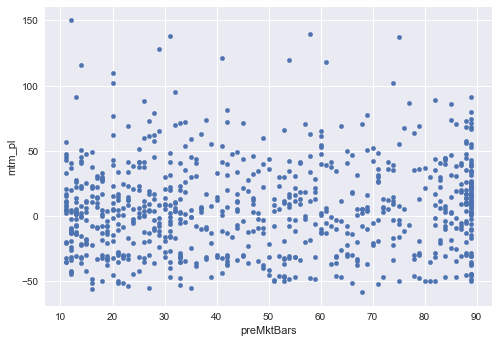

In [164]:
preMkt.plot(kind = 'scatter', x = 'preMktBars', y = 'mtm_pl')

In [165]:
after10min = preMkt[preMkt.minsFromOpen > 10]

AttributeError: 'DataFrame' object has no attribute 'minsFromOpen'

In [166]:
before10min = preMkt[preMkt.minsFromOpen < 10]

AttributeError: 'DataFrame' object has no attribute 'minsFromOpen'

In [167]:
preMkt.breakOut.describe()

AttributeError: 'DataFrame' object has no attribute 'breakOut'

In [168]:
sum(preMkt.mtm_pl)

4837.2265019723018

In [169]:
preMkt.exit_fees.sum()

98.14000000000004

In [170]:
preMkt.entry_fees.sum()

121.53999999999986

In [171]:
preMkt['netPL'] = preMkt.mtm_pl - preMkt.exit_fees - preMkt.exit_fees

In [172]:
preMkt.netPL.sum()

4640.9465019722975

In [173]:
preMkt.netPL.sum()/(preMkt.exit_shares.sum()*2)*100

8.706236637474763

In [174]:
preMkt.columns

Index([u'account', u'entry_collect', u'OpenLessPreMktLow', u'SPYGap',
       u'SPYLastLessOpen', u'SPYNetpercChange', u'SPYTwoWeekChange',
       u'SPYWeekChange', u'SPYyestChange', u'VWAPLessLast', u'breakTime',
       u'cloud', u'dayHighLessPreMktLow', u'east', u'gap', u'highLessOpen',
       u'pre931', u'preMktBars', u'preMktHighLessOpen', u'preMktLowLessLast',
       u'preMktRange', u'rvol', u'spread', u'twoWeekChange', u'vxxRVOL',
       u'wekChange', u'yestChange', u'yestcloseVWAP', u'entry_fees',
       u'entry_pl', u'entry_price', u'entry_shares', u'entry_side',
       u'entry_time', u'exit_collect', u'exit_fees', u'exit_price',
       u'exit_shares', u'exit_side', u'exit_time', u'matched_shares',
       u'mtm_pl', u'symbol', u'pos', u'breakBack', u'netPL'],
      dtype='object')

In [301]:
cloud = preMkt.loc[preMkt['cloud'] == 1]

In [313]:
cloudLow = cloud.loc[cloud['preMktBars'] < 35]

In [344]:
cloudLow.preMktHighLessOpen.describe()

count    128.000000
mean       1.344920
std        1.324709
min       -0.079101
25%        0.791473
50%        0.995938
75%        1.492639
max       12.774974
Name: preMktHighLessOpen, dtype: float64

In [368]:
#optimize highLessBreak
def loopVariable(list):
    for i in range(len(list)):
        new = cloudLow.loc[cloud['wekChange'] > list[i]]
        print "with preMktRange atr of >:", list[i]
        print 'p&l=',  sum(new.netPL)
        print 'trades=', len(new.index)
        print 'cents per share=', sum(new.mtm_pl)/sum(new.exit_shares*2)*100

list = [-.04]
loopVariable(list)

with preMktRange atr of >: -0.04
p&l= 706.800479851
trades= 109
cents per share= 9.19276504184


In [219]:
preRange  = pre931.loc[pre931['preMktRange'] < 1]

In [251]:
yestVWAP = preRange.loc[preRange['yestcloseVWAP'] < .75]

In [268]:
vwapToday = yestVWAP.loc[yestVWAP['VWAPLessLast'] > 0]

In [101]:
before10min.dayHighLessPreMktLow.describe()

count    840.000000
mean       0.324122
std        0.209510
min       -0.050237
25%        0.167866
50%        0.275984
75%        0.450510
max        0.991808
Name: dayHighLessPreMktLow, dtype: float64

In [108]:
#optimize spy open ATR
#optimize highLessBreak
def loopVariable(list):
    for i in range(len(list)):
        new = after10min.loc[after10min['dayHighLessPreMktLow'] > list[i]]
        print "with dayHighLessPreMktLow atr of >:", list[i]
        print 'p&l=',  sum(new.netPL)
        print 'trades=', len(new.index)
        print 'cents per share=', sum(new.mtm_pl)/sum(new.exit_shares*2)*100

list = [.4]
loopVariable(list)

with dayHighLessPreMktLow atr of >: 0.4
p&l=

AttributeError: 'DataFrame' object has no attribute 'netPL'

In [84]:
preMktMinBin.VWAPLessLast.describe()

count    1054.000000
mean        0.296878
std         0.161646
min         0.000114
25%         0.190882
50%         0.291585
75%         0.411012
max         0.960050
Name: VWAPLessLast, dtype: float64

In [85]:
def loopVariable(list):
    for i in range(len(list)):
        new = preMktMinBin.loc[preMktMinBin['VWAPLessLast'] > list[i]]
        print "with dayHighLessPreMktLow atr of >:", list[i]
        print 'p&l=',  sum(new.netPL)
        print 'trades=', len(new.index)
        print 'cents per share=', sum(new.mtm_pl)/sum(new.exit_shares*2)*100

list = [.2,.35]
loopVariable(list)

with dayHighLessPreMktLow atr of >: 0.2
p&l= 6566.13502865
trades= 764
cents per share= 3.69545281049
with dayHighLessPreMktLow atr of >: 0.35
p&l= 3713.55197519
trades= 382
cents per share= 4.06883388629


In [86]:
quickBreak = preMkt[preMkt.minsFromOpen < 10]